# Capstone Project: Detecting Pneumonia in Chest X-ray Images

This project aims to train an image classification model with images of labeled chest X-ray images of patients We will be using pytorch framework and transfer learning leveraging ResNet50 model for this project.

In [63]:

!pip install --upgrade pip
!pip install -U smdebug jinja2
!pip install torchvision
!pip install jinja2==3.0.3 --force-reinstall

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.0.3
    Uninstalling Jinja2-3.0.3:
      Successfully uninstalled Jinja2-3.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 3.3.4 requires jupyter-server~=1.4, but you have jupyter-server 2.0.6 which is incompatible.
jupyterlab-server 2.18.0 requires jsonschema>=4.17.3, but you have jsonschema 3.2.0 which is incompatible.
distributed 2022.11.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip

In [64]:
import sagemaker
import boto3
import numpy as np
import pandas as pd
import os
import random
import shutil

# Downloading the Dataset


In [ ]:
#downloaded from https://data.mendeley.com/datasets/rscbjbr9sj/2
!unzip ChestXRay.zip

In [24]:

os.listdir(path='./chest_xray/train/PNEUMONIA')

['person894_virus_1546.jpeg',
 'person36_bacteria_182.jpeg',
 'person23_bacteria_84.jpeg',
 'person357_virus_735.jpeg',
 'person1466_virus_2541.jpeg',
 'person275_virus_565.jpeg',
 'person906_virus_1562.jpeg',
 'person971_bacteria_2896.jpeg',
 'person581_bacteria_2400.jpeg',
 'person614_virus_1183.jpeg',
 'person1381_bacteria_3517.jpeg',
 'person18_bacteria_57.jpeg',
 'person257_bacteria_1199.jpeg',
 'person437_bacteria_1884.jpeg',
 'person40_bacteria_203.jpeg',
 'person162_virus_321.jpeg',
 'person294_bacteria_1388.jpeg',
 'person87_virus_160.jpeg',
 'person1418_bacteria_3638.jpeg',
 'person111_virus_209.jpeg',
 'person277_bacteria_1303.jpeg',
 'person312_virus_635.jpeg',
 'person1597_bacteria_4193.jpeg',
 'person348_bacteria_1603.jpeg',
 'person353_bacteria_1628.jpeg',
 'person275_bacteria_1291.jpeg',
 'person30_bacteria_147.jpeg',
 'person1079_bacteria_3019.jpeg',
 'person1183_virus_2018.jpeg',
 'person110_virus_207.jpeg',
 'person325_virus_661.jpeg',
 'person554_bacteria_2322.jpeg'

In [ ]:
# this dataset has only two folders - train and test.
# we will create another dataset 'valid' from the train dataset, randomly, 
# and make the validation dataset equal to the size of the train dataset

# Create Validation Dataset

In [ ]:
#Number of files in train/PNEUMONIA folder

# folder path
dir_path1 = r'./chest_xray/train/PNEUMONIA'
count = 0
# Iterate directory
for path in os.listdir(dir_path1):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path1, path)):
        count += 1
print('File count:', count)

In [ ]:
#Number of files in train/NORMAL

# folder path
dir_path2 = r'./chest_xray/train/NORMAL'
count = 0
# Iterate directory
for path in os.listdir(dir_path2):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path2, path)):
        count += 1
print('File count:', count)

In [ ]:
#Number of files in test/PNEUMONIA

# folder path
dir_path3 = r'./chest_xray/test/PNEUMONIA'
count = 0
# Iterate directory
for path in os.listdir(dir_path3):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path3, path)):
        count += 1
print('File count:', count)

In [ ]:
#Number of files in test/NORMAL folder

# folder path
dir_path4 = r'./chest_xray/test/NORMAL'
count = 0
# Iterate directory
for path in os.listdir(dir_path4):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path4, path)):
        count += 1
print('File count:', count)

In [ ]:
#os.mkdir('./chest_xray/valid')

In [ ]:
try: 
    os.mkdir('./chest_xray/valid/NORMAL') 
    os.mkdir('./chest_xray/valid/PNEUMONIA') 
except OSError as error: 
    print(error)

# moving data from training set to validation set

In [ ]:
source1 = './chest_xray/train/PNEUMONIA'
dest1 = './chest_xray/valid/PNEUMONIA'

files1 = os.listdir(source1)
no_of_files1 = 390 #same number as test files

for file_name in random.sample(files1, no_of_files1):
    shutil.move(os.path.join(source1, file_name), dest1)

In [ ]:
source2 = './chest_xray/train/NORMAL'
dest2 = './chest_xray/valid/NORMAL'

files2 = os.listdir(source2)
no_of_files2 = 234 #same number as test files

for file_name in random.sample(files2, no_of_files2):
    shutil.move(os.path.join(source2, file_name), dest2)

In [ ]:
#Number of files in valid/NORMAL folder

# folder path
dir_path4 = r'./chest_xray/valid/NORMAL'
count = 0
# Iterate directory
for path in os.listdir(dir_path4):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path4, path)):
        count += 1
print('File count:', count)

In [ ]:
#Number of files in valid/PNEUMONIA folder

# folder path
dir_path4 = r'./chest_xray/valid/PNEUMONIA'
count = 0
# Iterate directory
for path in os.listdir(dir_path4):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path4, path)):
        count += 1
print('File count:', count)

In [ ]:
# So, at this stage we have the following no. of images
# train/PNEUMONIA 3494
# train/NORMAL 1115
# valid/PNEUMONIA 390
# valid/NORMAL 234
# test/PNEUMONIA 390
# test/NORMAL 234

## Creating a buffer folder and moving images to balance training inputs

In [ ]:
os.mkdir('./chest_xray/buffer')

In [ ]:
try: 
    os.mkdir('./chest_xray/buffer/NORMAL') 
    os.mkdir('./chest_xray/buffer/PNEUMONIA') 
except OSError as error: 
    print(error)

In [ ]:
source1 = './chest_xray/train/PNEUMONIA'
dest1 = './chest_xray/buffer/PNEUMONIA'

files1 = os.listdir(source1)
no_of_files1 = 2000 #moving files

for file_name in random.sample(files1, no_of_files1):
    shutil.move(os.path.join(source1, file_name), dest1)

In [6]:
#Number of files in train/PNEUMONIA folder

# folder path
dir_path1 = r'./chest_xray/train/PNEUMONIA'
count = 0
# Iterate directory
for path in os.listdir(dir_path1):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path1, path)):
        count += 1
print('File count:', count)

File count: 1494


# Dataset Is now Ready

In [5]:
ls

chest_xray/    lost+found/  ProfilerReport/  test_y
ChestXRay.zip  __MACOSX/    __pycache__/     train_and_deploy.ipynb
hpo.py         output/      testfolder/      train_model.py


In [19]:
cd SageMaker

/home/ec2-user/SageMaker


In [20]:
ls

chest_xray/    lost+found/  ProfilerReport/  test_y
ChestXRay.zip  __MACOSX/    __pycache__/     train_and_deploy.ipynb
hpo.py         output/      testfolder/      train_model.py


In [6]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [7]:
from torch.utils.data import DataLoader
from sagemaker.pytorch import PyTorch, PyTorchModel
from sagemaker.debugger import DebuggerHookConfig, TensorBoardOutputConfig
from sagemaker.tuner import HyperparameterTuner, IntegerParameter, CategoricalParameter

# set up SageMaker session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# Create S3 bucket and Upload the data there

In [65]:
BUCKET = "sumeet-capstone-xray2"

In [10]:
!aws s3 mb s3://{BUCKET}

make_bucket: sumeet-capstone-xray2


In [11]:
! aws s3 cp ./chest_xray/ s3://{BUCKET}/ --recursive

upload: chest_xray/.DS_Store to s3://sumeet-capstone-xray2/.DS_Store                
upload: chest_xray/buffer/PNEUMONIA/person1001_bacteria_2932.jpeg to s3://sumeet-capstone-xray2/buffer/PNEUMONIA/person1001_bacteria_2932.jpeg
upload: chest_xray/buffer/PNEUMONIA/person1003_bacteria_2934.jpeg to s3://sumeet-capstone-xray2/buffer/PNEUMONIA/person1003_bacteria_2934.jpeg
upload: chest_xray/buffer/PNEUMONIA/person1007_bacteria_2938.jpeg to s3://sumeet-capstone-xray2/buffer/PNEUMONIA/person1007_bacteria_2938.jpeg
upload: chest_xray/buffer/PNEUMONIA/person1003_virus_1685.jpeg to s3://sumeet-capstone-xray2/buffer/PNEUMONIA/person1003_virus_1685.jpeg
upload: chest_xray/buffer/PNEUMONIA/person1009_virus_1694.jpeg to s3://sumeet-capstone-xray2/buffer/PNEUMONIA/person1009_virus_1694.jpeg
upload: chest_xray/buffer/PNEUMONIA/person1010_virus_1695.jpeg to s3://sumeet-capstone-xray2/buffer/PNEUMONIA/person1010_virus_1695.jpeg
upload: chest_xray/buffer/PNEUMONIA/person1014_bacteria_2945.jpeg to s3://s

## Create Data Channels For Using Data in Model

In [66]:
data_channels = {
                    "train": f"s3://{BUCKET}/train",
                    "valid": f"s3://{BUCKET}/valid",
                    "test": f"s3://{BUCKET}/test"

                }

In [67]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True 
#disable image truncated error

## Hyperparameter Tuning

use the `hpo.py` script to perform hyperparameter tuning.

In [14]:
# HP ranges, metrics etc.

from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)


hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([16, 32])
    #"epochs": IntegerParameter(4, 8)
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [68]:
#TODO: Create estimators for your HPs


from torchvision import transforms
from sagemaker.pytorch import PyTorch
import gzip 
import numpy as np
import random
import os

sagemaker_session = sagemaker.Session()

bucket = BUCKET
prefix = "sagemaker/capstone"

role = sagemaker.get_execution_role()

local_dir = 'chest_xray'

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [69]:

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Running on Device {device}")


Running on Device cpu


In [70]:
#inputs = sagemaker_session.upload_data(path="local_dir", bucket=bucket, key_prefix=prefix)
#print("input spec (in this case, just an S3 path): {}".format(inputs))

#estimator = # TODO: Your estimator here

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.p2.xlarge"
)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [71]:
#HP tuner here

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=1,
    objective_type=objective_type,
)

In [72]:
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

def create_data_loaders(data, batch_size):
    
    transform = transforms.Compose ([
        transforms.Grayscale(num_output_channels=1),
        #converts image to 1 color channel
        transforms.Resize((224,224)),
        transforms.ToTensor()
        ])
    
    data = torchvision.datasets.ImageFolder(root=data, transform=transform)
   
    
    data_loader = torch.utils.data.DataLoader(data,
                                             batch_size=batch_size,
                                             shuffle=True,
                                            )
    return data_loader


# run estimator.fit( ) to see if everything works so far

In [23]:
#testing out by just running the estimator before running the tuner

estimator.fit(data_channels, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-03-30-13-40-51-551


2023-03-30 13:40:52 Starting - Starting the training job...
2023-03-30 13:41:22 Starting - Preparing the instances for training.........
2023-03-30 13:42:43 Downloading - Downloading input data.........
2023-03-30 13:44:14 Training - Downloading the training image............
2023-03-30 13:46:21 Training - Training image download completed. Training in progress.....bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-03-30 13:46:55,133 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-03-30 13:46:55,156 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-03-30 13:46:55,158 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-03-30 13:46:55,438 sagemaker-training-toolkit INFO     Invoking user script
Training Env:
{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "test": "/opt/m

# run the tuner.fit( ) to determine the best hyperparameters

In [21]:
#Fitting the HP Tuner


tuner.fit(data_channels, wait=True)


No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


.....................................................................................................................................................................................................................................................!


# saved tuner

### pytorch-training-230331-0850

In [73]:
#For hyperparameter tuning jobs:
from sagemaker.tuner import HyperparameterTuner
tuner = HyperparameterTuner.attach('pytorch-training-230331-0850')

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


## best training job during tuning

In [74]:
#best training job, best estimator, and the best HPs
best_training_job = tuner.best_training_job()
best_training_job

'pytorch-training-230331-0850-003-7c0b8d55'

### 'pytorch-training-230331-0850-003-7c0b8d55'

In [75]:
best_estimator = tuner.best_estimator()
best_estimator


2023-03-31 09:08:12 Starting - Found matching resource for reuse
2023-03-31 09:08:12 Downloading - Downloading input data
2023-03-31 09:08:12 Training - Training image download completed. Training in progress.
2023-03-31 09:08:12 Uploading - Uploading generated training model
2023-03-31 09:08:12 Completed - Resource reused by training job: pytorch-training-230331-0850-004-faf13663


## hyperparameters in best training job

In [76]:
#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"16"',
 'lr': '0.0012754177720257886',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-03-31-08-50-50-858"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-934421875319/pytorch-training-2023-03-31-08-50-50-858/source/sourcedir.tar.gz"'}

## Hyperparameters are now determined

batch-size: 16

lr: 0.0012754177720257886

### saved training job name (check from console)

In [77]:
training_job_name = 'pytorch-training-230331-0850-003-7c0b8d55'

### saved estimator

In [78]:
#For training jobs, use this code to attach a complted training job:
from sagemaker.pytorch import PyTorch
estimator = PyTorch.attach(training_job_name)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole



2023-03-31 09:08:12 Starting - Found matching resource for reuse
2023-03-31 09:08:12 Downloading - Downloading input data
2023-03-31 09:08:12 Training - Training image download completed. Training in progress.
2023-03-31 09:08:12 Uploading - Uploading generated training model
2023-03-31 09:08:12 Completed - Resource reused by training job: pytorch-training-230331-0850-004-faf13663


In [79]:
best_estimator = estimator
best_estimator.hyperparameters()

{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"16"',
 'lr': '0.0012754177720257886',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-03-31-08-50-50-858"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-934421875319/pytorch-training-2023-03-31-08-50-50-858/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [80]:
# Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, ProfilerRule, rule_configs, CollectionConfig
from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile

In [81]:
rules = [
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
]

In [82]:
# Set up debugging hook
debugger_config = DebuggerHookConfig(
                    s3_output_path = f"s3://{BUCKET}/output/",
                    hook_parameters={"train.save_interval": "8", "eval.save_interval": "1"},
                    collection_configs = [
                                    CollectionConfig(
                                        name="CrossEntopyLoss_output",
                                        parameters={
                                            "include_regex": "CrossEntropyLoss_output.*",
                                            "train.save_interval": "1",
                                            "eval.save_interval": "1",
                                            "predict.save_interval": "1"
                                                    },
                                                    )
                                        ]
                                    )

In [83]:
# Set up profiling hook
profiler_config = ProfilerConfig(
                        system_monitor_interval_millis=500,
                        framework_profile_params=FrameworkProfile(num_steps=10)
                                )

# Running the estimator( ).fit with the best hyperparameters, on more epochs now

In [39]:
# best hyperparameters based on tuning results above in best_estimator.hyperparameters()

best_hyperparameters = {"batch-size": "16", "lr": "0.0012754177720257886"}

In [40]:
# Create and fit an estimator


estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.p2.xlarge",
    entry_point="train_model.py", 
    framework_version="1.8",
    py_version="py36",
    hyperparameters=best_hyperparameters,
    profiler_config=profiler_config,
    debugger_hook_config=debugger_config,
    rules=rules,
)

## Estimator using best hyperparameters 


In [41]:
#running on 10 epochs with best hyperparameters

estimator.fit(data_channels, wait=True)


INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-03-31-09-20-58-140


2023-03-31 09:20:58 Starting - Starting the training job...LossNotDecreasing: InProgress
VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
...
2023-03-31 09:21:44 Starting - Preparing the instances for training......
2023-03-31 09:22:50 Downloading - Downloading input data......
2023-03-31 09:23:51 Training - Downloading the training image.....................
2023-03-31 09:27:27 Training - Training image download completed. Training in progress.....bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-03-31 09:27:57,775 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-03-31 09:27:57,800 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-03-31 09:27:57,803 sagemaker_pytorch_container.training INFO     Invoking user tra

In [43]:
estimator

### Save The Estimator

In [44]:
estimator.hyperparameters()

{'batch-size': '"16"',
 'lr': '"0.0012754177720257886"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-934421875319/pytorch-training-2023-03-31-09-20-58-140/source/sourcedir.tar.gz"',
 'sagemaker_program': '"train_model.py"',
 'sagemaker_container_log_level': '20',
 'sagemaker_job_name': '"pytorch-training-2023-03-31-09-20-58-140"',
 'sagemaker_region': '"us-east-1"'}

##

# Save the new estimator name with best HPs (check in console)

In [85]:
estimator_besthp_training_job_name = 'pytorch-training-2023-03-31-09-20-58-140'

## Load the estimator if kernel dies

In [86]:
#For training jobs, use this code to attach a complted training job:
from sagemaker.pytorch import PyTorch
estimator_new = PyTorch.attach(estimator_besthp_training_job_name)


INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole



2023-03-31 10:17:10 Starting - Preparing the instances for training
2023-03-31 10:17:10 Downloading - Downloading input data
2023-03-31 10:17:10 Training - Training image download completed. Training in progress.
2023-03-31 10:17:10 Uploading - Uploading generated training model
2023-03-31 10:17:10 Completed - Training job completed


In [47]:
#

In [87]:
estimator = estimator_new
estimator

In [88]:
#Plot a debugging output.
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

In [50]:
session = boto3.session.Session()
region = session.region_name

In [89]:
training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")


Training jobname: pytorch-training-2023-03-31-09-20-58-140
Region: us-east-1


In [90]:
debut_output_path_generated = estimator.latest_job_debugger_artifacts_path()


In [96]:
print(debut_output_path_generated)

#if NONE, then hardcode the path from below (or check in console)

None


In [98]:
print("s3://{}/output/{}/debug-output/".format(BUCKET, estimator_besthp_training_job_name))

s3://sumeet-capstone-xray2/output/pytorch-training-2023-03-31-09-20-58-140/debug-output/


In [99]:
#hardcoded debug output path
debug_output_path = "s3://sumeet-capstone-xray2/output/pytorch-training-2023-03-31-09-20-58-140/debug-output/"
print(debug_output_path)

s3://sumeet-capstone-xray2/output/pytorch-training-2023-03-31-09-20-58-140/debug-output/


#

In [100]:
trial = create_trial(debug_output_path)


[2023-03-31 10:56:33.716 ip-172-16-61-37.ec2.internal:6212 INFO s3_trial.py:42] Loading trial  at path s3://sumeet-capstone-xray2/output/pytorch-training-2023-03-31-09-20-58-140/debug-output/


INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [101]:
print(trial.tensor_names())

[2023-03-31 10:58:08.426 ip-172-16-61-37.ec2.internal:6212 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.
[2023-03-31 10:58:09.446 ip-172-16-61-37.ec2.internal:6212 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.0.relu_input_2', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer1.1.relu_input_2', 'layer1.2.relu_input_0', 'layer1.2.relu_input_1', 'layer1.2.relu_input_2', 'layer2.0.relu_input_0', 'layer2.0.relu_input_1', 'layer2.0.relu_input_2', 'layer2.1.relu_input_0', 'layer2.1.relu_input_1', 'layer2.1.relu_input_2', 'layer2.2.relu_input_0', 'layer2.2.relu_input_1', 'layer2.2.relu_input_2', 'layer2.3.relu_input_0', 'layer2.3.relu_input_1', 'layer2.3.relu_input_2', 'layer3.0.relu_input_0', 'layer3.0.relu_input_1', 'layer3.0.relu_input_2', 'layer3.1.relu_input_0', 'layer3.1.relu_input_1', 'layer3.1.relu_input_2', 'lay

#

In [102]:
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

4401
1053


In [103]:
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()

ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-934421875319/', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }'}, 'DisableProfiler': False}
s3 path:s3://sagemaker-us-east-1-934421875319/pytorch-training-2023-03-31-09-20-58-140/profiler-output


Profiler data from system is available


In [104]:
system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

In [105]:
view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)

[2023-03-31 10:58:36.812 ip-172-16-61-37.ec2.internal:6212 INFO metrics_reader_base.py:134] Getting 55 event files
select events:['total']
select dimensions:['CPU', 'GPU']
filtered_events:{'total'}
filtered_dimensions:{'GPUUtilization-nodeid:algo-1', 'CPUUtilization-nodeid:algo-1', 'GPUMemoryUtilization-nodeid:algo-1'}


## You will find the profiler report in 


In [106]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-1-934421875319/pytorch-training-2023-03-31-09-20-58-140/rule-output


In [107]:
! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive

2023-03-31 10:16:45     448552 pytorch-training-2023-03-31-09-20-58-140/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-03-31 10:16:44     309431 pytorch-training-2023-03-31-09-20-58-140/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-03-31 10:16:39        580 pytorch-training-2023-03-31-09-20-58-140/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-03-31 10:16:39      37015 pytorch-training-2023-03-31-09-20-58-140/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-03-31 10:16:39       2034 pytorch-training-2023-03-31-09-20-58-140/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-03-31 10:16:39        329 pytorch-training-2023-03-31-09-20-58-140/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-03-31 10:16:39       2981 pytorch-training-2023-03-31-09-20-58-140/rule-output/ProfilerReport/profiler-output/profiler-re

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [108]:
# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]


In [109]:
# TODO: Display the profiler output
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

#comment out to avoid the whiteout of UI in sagemaker

In [110]:
trial.tensor_names()

['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.0.relu_input_2',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer1.1.relu_input_2',
 'layer1.2.relu_input_0',
 'layer1.2.relu_input_1',
 'layer1.2.relu_input_2',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.0.relu_input_2',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer2.1.relu_input_2',
 'layer2.2.relu_input_0',
 'layer2.2.relu_input_1',
 'layer2.2.relu_input_2',
 'layer2.3.relu_input_0',
 'layer2.3.relu_input_1',
 'layer2.3.relu_input_2',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.0.relu_input_2',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer3.1.relu_input_2',
 'layer3.2.relu_input_0',
 'layer3.2.relu_input_1',
 'layer3.2.relu_input_2',
 'layer3.3.relu_input_0',
 'layer3.3.relu_input_1',
 'layer3.3.relu_input_2',
 'layer3.4.relu_input_0',
 'layer3.4.relu_input_1'

In [112]:
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

4401
1053


In [113]:
tensor = trial.tensor("CrossEntropyLoss_output_0")
tensor

In [119]:
steps_train = tensor.steps(mode=ModeKeys.TRAIN)
len(steps_train)

4401

In [120]:
steps_eval = tensor.steps(mode=ModeKeys.EVAL)
len(steps_eval)

1053

In [121]:
vals_train = []

In [122]:
vals_eval = []


In [123]:
for s in range(0,len(steps_train),25):
    vals_train.append(tensor.value(s, mode=ModeKeys.TRAIN))    
    

In [124]:
for s in range(0,len(steps_eval),25):
    vals_eval.append(tensor.value(s, mode=ModeKeys.EVAL))    
    

In [125]:
len(vals_train)

177

In [126]:
len(vals_eval)

43

In [71]:
#vals_train

In [72]:
#vals_eval

INFO:matplotlib.font_manager:generated new fontManager


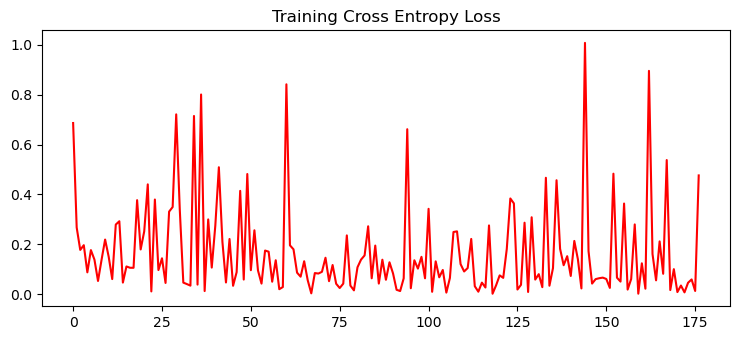

In [127]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Training Cross Entropy Loss")
plt.plot(vals_train, color="red")
plt.show()

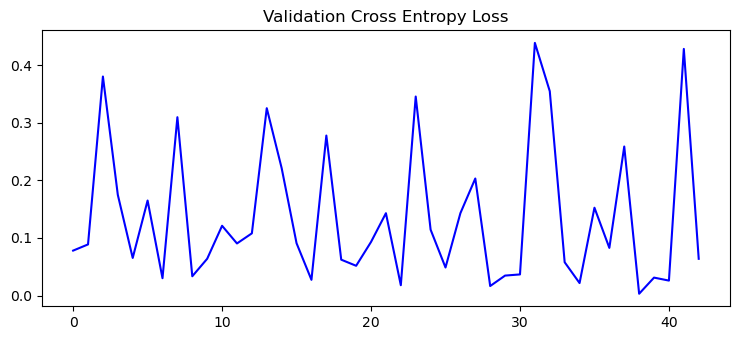

In [128]:
import matplotlib.pyplot as plt2
plt2.rcParams["figure.figsize"] = [7.50, 3.50]
plt2.rcParams["figure.autolayout"] = True
plt2.title("Validation Cross Entropy Loss")
plt2.plot(vals_eval, color="blue")
plt2.show()

## Model Deploying

In [129]:
# Deploy your model to an endpoint

#predictor=estimator.deploy() # TODO: Add your deployment configuration like instance type and number of instances
#predictor = estimator.deploy(initial_instance_count=1, instance_type="ml.t2.medium")

predictor = estimator.deploy(initial_instance_count=1, instance_type="ml.p2.xlarge")




INFO:sagemaker:Creating model with name: pytorch-training-2023-03-31-11-09-23-485
INFO:sagemaker:Creating endpoint-config with name pytorch-training-2023-03-31-11-09-23-485
INFO:sagemaker:Creating endpoint with name pytorch-training-2023-03-31-11-09-23-485


-------------!

In [130]:
endpoint_name = predictor.endpoint_name

# Endpoint Name is:

In [131]:
endpoint_name

'pytorch-training-2023-03-31-11-09-23-485'

#

# To reload predictor using the endpoint name

In [132]:
predictor = sagemaker.pytorch.model.PyTorchPredictor(endpoint_name)

# Send a Single Image To Endpoint, without using the data_loader

## this code below can be in a separate Lambda function to query the endpoint

In [133]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
data = ImageFolder(root='./chest_xray/train', transform=ToTensor())

In [134]:
data.classes

['NORMAL', 'PNEUMONIA']

In [142]:
testimgpath = "./chest_xray/test/NORMAL/NORMAL2-IM-0035-0001.jpeg"

In [143]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the image from file
testimg = Image.open(testimgpath)

# Define the transformation pipeline to resize and normalize the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
    #transforms.Grayscale()
])

# Apply the transformation pipeline to the image
img_tensor = transform(testimg)
print("img_tensor shape: " , img_tensor.shape)

trans = transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x)
testimgRGB = trans(img_tensor)
print("after RGB conversion shape: " , testimgRGB.shape)

# Add an extra dimension to represent the batch size (in this case, 1)
img_tensor_new = testimgRGB.unsqueeze(0)

# Print the tensor's dimensions
print("after adding one more dim shape: " , img_tensor_new.shape)  # Output: torch.Size([1, 3, 224, 224])

response = predictor.predict(img_tensor_new)

response_index = np.argmax(response, axis=1)
response_index

print("Inference: ", data.classes[response_index[0]])

img_tensor shape:  torch.Size([1, 224, 224])
after RGB conversion shape:  torch.Size([3, 224, 224])
after adding one more dim shape:  torch.Size([1, 3, 224, 224])
Inference:  NORMAL


## tried various images, and the ineference was correct each time


# Prepare and send a BATCH of Test Images To Endpoint

In [144]:
from train_model import create_data_loaders

/home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com

Requirement already satisfied: smdebug in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (1.0.12)

Requirement already satisfied: protobuf>=3.6.0 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from smdebug) (3.20.2)

Requirement already satisfied: pyinstrument==3.4.2 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from smdebug) (3.4.2)

Requirement already satisfied: numpy>=1.16.0 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from smdebug) (1.23.5)

Requirement already satisfied: boto3>=1.10.32 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from smdebug) (1.26.71)

Requirement already satisfied: packaging in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from smdebug) (21.3)

Requirement already satisfied: pyinstrument-cext>=0.2.2 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from pyinstrument==3.4.2->smdebug) (0.2.4)

Requirement already satisfied: jmespath<2.0.0,>=0.7.1 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from boto3>=1.10.32->smdebug) (1.0.1)

Requirement already satisfied: s3transfer<0.7.0,>=0.6.0 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from boto3>=1.10.32->smdebug) (0.6.0)

Requirement already satisfied: botocore<1.30.0,>=1.29.71 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from boto3>=1.10.32->smdebug) (1.29.71)

Requirement already satisfied: pyparsing!=3.0.5,>=2.0.2 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from packaging->smdebug) (3.0.9)

Requirement already satisfied: urllib3<1.27,>=1.25.4 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from botocore<1.30.0,>=1.29.71->boto3>=1.10.32->smdebug) (1.26.8)

Requirement already satisfied: python-dateutil<3.0.0,>=2.1 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from botocore<1.30.0,>=1.29.71->boto3>=1.10.32->smdebug) (2.8.2)

Requirement already satisfied: six>=1.5 in /home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages (from python-dateutil<3.0.0,>=2.1->botocore<1.30.0,>=1.29.71->boto3>=1.10.32->smdebug) (1.16.0)

[2023-03-31 11:20:32.899 ip-172-16-61-37.ec2.internal:6212 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


In [165]:
test_loader = create_data_loaders("./chest_xray/test", 7)

In [166]:
for idx, batch in enumerate(test_loader):
    print('Batch index: ', idx)
    print('Batch size: ', batch[0].size())
    print('Batch label: ', batch[1])
    break
    

Batch index:  0
Batch size:  torch.Size([7, 3, 224, 224])
Batch label:  tensor([0, 1, 0, 1, 0, 0, 1])


In [167]:
#batch[0] #tensors

In [168]:
batch[1] #labels

tensor([0, 1, 0, 1, 0, 0, 1])

In [169]:
# i sent the images with labels as given above

In [170]:
# response
response = predictor.predict(batch[0])
response_index = np.argmax(response, axis=1)
response_index

array([1, 1, 0, 1, 1, 1, 1])

# Delete Endpoint

In [171]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

Deleting endpoint configuration with name: pytorch-training-2023-03-31-11-09-23-485

Deleting endpoint with name: pytorch-training-2023-03-31-11-09-23-485